<a href="https://colab.research.google.com/github/prakruti-sid/ML-Grocery-Sales-Prediction/blob/main/ML_Grocery_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Grocery Sales Prediction Model using Machine Learning 🛒

>Prakruthi Sidram



## Loading Dataset 🔢

In [1]:
# Libraries 

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display= 'diagram')

In [2]:
# data
path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQPMdCEJ1LpPZar8BrFWWWcZ0hC-77-3LtM8O02UAp-hQ8fuXWVd_NDf5zeKu1nYVS1D6HtrgzemDMS/pub?output=csv'

In [3]:
grocery = pd.read_csv(path)
grocery.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Copy the dataframe
df = grocery.copy()

### Initial Inspection 🔎

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# Duplicates Check and Fix

df.duplicated().sum()

0

In [7]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Our '`target`' for this model is `Item_Outlet_Sales`
which does not have any `missing` values. So we will not `drop` any rows at this point.

Exploring the Features 🔍

 Columns | Dtype | Feature Type
--------- | --------| ----------| 
0   Item_Identifier   |    object | Nominal 
1   Item_Weight  |   float64 | Numerical
2   Item_Fat_Content    |  object | Nominal
3   Item_Visibility         | float64 | Numerical
4   Item_Type               | object | Nominal
5   Item_MRP                   |  float64 | Numerical
6   Outlet_Identifier          |  object | Nominal
7  Outlet_Establishment_Year   |int64 | Numerical
8   Outlet_Size                  |object | Ordinal
9   Outlet_Location_Type         |object | Ordinal
10  Outlet_Type                 |object | Nominal
11  Item_Outlet_Sales            |float64| Numerical

### Pre Split Cleaning ❎
Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.* (There is a way to do this after the split, but for this project, you may perform this step before the split)

In [ ]:
# Dropping the Identifier Columns as it won't help the model
df.drop(['item_identifier','outlet_identifier'], axis=1,inplace=True)

In [10]:
# Inspecting categorical columns 
for col in df.select_dtypes(include= 'object').columns:
  display(df[col].value_counts())
  print('\n')

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

Fixing Inconsistencies 

In [11]:
# Fixing Fat Content Column 
df.columns = df.columns.str.lower()
fat_content_map = {'reg':'Regular',
                   'LF' : 'Low Fat',
                   'low fat' : 'Low Fat'
                   }
df['item_fat_content'] = df['item_fat_content'].replace(fat_content_map)

In [12]:
df['item_fat_content'].value_counts()

Low Fat    5517
Regular    3006
Name: item_fat_content, dtype: int64

In [13]:
df.replace(['High'],['Large'],inplace=True)

In [14]:
df['outlet_size'].value_counts()

Medium    2793
Small     2388
Large      932
Name: outlet_size, dtype: int64

## Validation, Encoding & Transformers 🔰 

### Validation Split 🔪

In [15]:
# Target y :
y = df['item_outlet_sales']
# Features X
X = df.drop(columns=['item_outlet_sales'])

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

### Pipelines & Transformers *🗒*

#### Instantiate Transformers 🖌

In [17]:
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown= 'ignore')

mean_imputer = SimpleImputer(strategy='mean')
most_freq_imputer = SimpleImputer(strategy='most_frequent')


#### Ordinal Encoder

In [18]:
df['outlet_location_type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: outlet_location_type, dtype: int64

In [19]:
# Ordinal Category : outlet_size , outlet_loc_type
outletsize_labels = ['Small','Medium','Large']
outletloctype_labels =['Tier 3','Tier 2','Tier 1']

ordered_labels = [outletsize_labels, outletloctype_labels]

ordinal = OrdinalEncoder(categories=ordered_labels)

#### Pipelines 🚧

In [20]:
number_pipe = make_pipeline(mean_imputer,scaler)
ordinal_pipe = make_pipeline(most_freq_imputer,ordinal)
nominal_pipe = make_pipeline(most_freq_imputer,ohe)

In [21]:
# tuples to pair pipeline with columns

num_selector = make_column_selector(dtype_include='number')
ord_cols = ['outlet_size','outlet_location_type']
nom_cols = ['item_fat_content', 'item_type','outlet_type']

num_tuple = (number_pipe, num_selector)
ord_tuple = (ordinal_pipe, ord_cols)
nom_tuple = (nominal_pipe,nom_cols)

#### Applying  preprocessing to columns 🚧


In [22]:
preprocessor = make_column_transformer(ord_tuple,
                                       nom_tuple,
                                       num_tuple,
                                       remainder = 'passthrough')

In [23]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'Large'],
                                                                             ['Tier '
                                                                              '3',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '1']]))]),
                                 ['outlet_size', 'outlet_location_type']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['item_fat_content', 'item_type',
                                  'outlet_type']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f4d5aef1250>)])

#### Fit Transformer on the Training Data

In [24]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'Large'],
                                                                             ['Tier '
                                                                              '3',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '1']]))]),
                                 ['outlet_size', 'outlet_location_type']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['item_fat_content', 'item_type',
                                  'outlet_type']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f4d5aef1250>)])

In [25]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [26]:
X_train_df = pd.DataFrame(X_train_processed)
display(X_train_df.head())
X_train_df.info()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.817249,-0.712775,1.828109,1.327849,NCG06,OUT018
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.55634,-1.291052,0.603369,1.327849,FDV57,OUT018
2,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.131512,1.813319,0.244541,0.136187,FDM27,OUT049
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-1.169219,-1.004931,-0.952591,0.732018,FDG24,OUT035
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.528819,-0.965484,-0.33646,0.493686,FDD05,OUT045


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       6392 non-null   object
 1   1       6392 non-null   object
 2   2       6392 non-null   object
 3   3       6392 non-null   object
 4   4       6392 non-null   object
 5   5       6392 non-null   object
 6   6       6392 non-null   object
 7   7       6392 non-null   object
 8   8       6392 non-null   object
 9   9       6392 non-null   object
 10  10      6392 non-null   object
 11  11      6392 non-null   object
 12  12      6392 non-null   object
 13  13      6392 non-null   object
 14  14      6392 non-null   object
 15  15      6392 non-null   object
 16  16      6392 non-null   object
 17  17      6392 non-null   object
 18  18      6392 non-null   object
 19  19      6392 non-null   object
 20  20      6392 non-null   object
 21  21      6392 non-null   object
 22  22      6392 non-null   

## Evaluation 🧪

#### Linear Regression Model 🇱

`Regression Models` help predict `continuous values`. Eg: `Price`
- So we will be working with the numerical columns in this section

Lets start by building a `linear regression model to predict sales`. And

- Evaluate the performance of model based on `r^2`.
- Evaluate the performance of model based on `rmse`.

In [40]:
# Libraries
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import plot_tree

In [54]:
num_processor = make_column_transformer(num_tuple,remainder='drop')

In [56]:
# instantiate a linear regression model
dummy_reg = DummyRegressor(strategy='mean')

# model into a pipeline
dummy_pipe = make_pipeline(num_processor, dummy_reg)

## fit your pipe on the training data
dummy_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4d5aef1250>)])),
                ('dummyregressor', DummyRegressor())])

In [57]:
train_pred_dummy = dummy_pipe.predict(X_train)
test_pred_dummy = dummy_pipe.predict(X_test)

#### Calculating the Regression Metrics 🔢

In [67]:
'''
We'll write a Evaluation Regression Function 
in order to call metrics and not repeat typing out.
*** Best Practise to make functions for repetative tasks ***
'''
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def eval_regression (true, pred):
  mae = mean_absolute_error(true, pred).round(2)
  mse = mean_squared_error(true, pred).round(2)
  rmse = np.sqrt(mse).round(2)
  r2 = r2_score(true, pred).round(4)

  print(f'MAE {mae},\n MSE {mse},\n RMSE: {rmse}, \n R^2: {r2}')

In [58]:
eval_regression(y_train, train_pred_dummy)

MAE 1360.22,
 MSE 2959455.7,
 RMSE: 1720.31, 
 R^2: 0.0


In [59]:
eval_regression(y_test, test_pred_dummy)

MAE 1326.12,
 MSE 2772144.46,
 RMSE: 1664.98, 
 R^2: -0.004772483978719766


Since the `RMSE` and the `r^2` `scores aren't great` for the `Linear Regression Model`, let's try `Regression Tree Model`

#### Regression Tree Model 🌴

Again we will
  -  Build a simple `regression tree` model.
  - Compare the performance of the model based on `r^2`.
  -  Compare the performance of the model based on `rmse`.  

In [101]:
# Libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

1) High Bias - Simple Tree

In [93]:
# Lets start with the simplest tree 
dec_tree1 = DecisionTreeRegressor(max_depth=1)  # cutting off at depth=1 : for the highest bias possible

# Put model in the pipeline with the preprocessor
dec_pipe1 = make_pipeline(num_processor, dec_tree1)

# Fit the model on Training Data
dec_pipe1.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4d5aef1250>)])),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=1))])

In [94]:
print('Training :')
eval_regression(y_train, dec_pipe1.predict(X_train))
print('Testing :')
eval_regression(y_test, dec_pipe1.predict(X_test))

Training :
MAE 1138.53,
 MSE 2255705.55,
 RMSE: 1501.9, 
 R^2: 0.2378
Testing :
MAE 1112.15,
 MSE 2125288.24,
 RMSE: 1457.84, 
 R^2: 0.2297


#### 2) An optimum Decision Tree 🌳

##### Step 1 & 2: Import Libraries & Make an instance of the Model


In [95]:
dec_tree = DecisionTreeRegressor(max_depth=None)

In [96]:
dec_pipe = make_pipeline(num_processor, dec_tree)

##### Step 3: Fit the model using your training data.  

The model is learning the relationship between the `features (X)` and the `target (y)`.

In [97]:
dec_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4d5aef1250>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

##### Step 4: Predict the `target` values for the `training set` and the `test set`. 

 (Note: You can get the score without this step, but if you want to actually see what the predictions are, this is a helpful step)

In [98]:
d_train_pred = dec_pipe.predict(X_train)
d_test_pred = dec_pipe.predict(X_test)

##### Step 5: Evaluate the Model

The default metric for regression models is the `R^2 Score`.  That is what you will get with the `.score()` method from a `regression model`.

In [99]:
d_train_score = dec_pipe.score(X_train, y_train)
d_test_score = dec_pipe.score(X_test,y_test)

print('TRAINING :')
eval_regression(y_train, d_train_pred)
print(d_train_score)

print('TESTING :')
eval_regression(y_test,d_test_pred)
print(d_test_score)

TRAINING :
MAE 0.0,
 MSE 0.0,
 RMSE: 0.0, 
 R^2: 1.0
1.0
TESTING :
MAE 1255.75,
 MSE 3409285.12,
 RMSE: 1846.42, 
 R^2: -0.2357
-0.23570611994737045


The `default decision tree` had a much higher `R^2 score` on the `training data` than it did on the `test data`.  This is an indication that the` model is overfitting` hence demonstating `High Variance` 

Let's try to Tune in for better test score

#### Step 6: Tune the Model 🔧

To explore `what can be tuned for a model`, it can be very helpful to use the `.get_params()` method. The output will be all of the parameters you can adjust when you instantiate that type of model. 

In [91]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [100]:
dec_tree.get_depth()

40

#### We will `tune` the `hyperparameter` : `max_depth` by finding the `optimal max_depth` & running model

In [103]:
# create a range of max_depth values to loop over :
depths = range(1, 41)
# Dataframe to store the score for each iteration of max_depth
scores = pd.DataFrame(index= depths, columns = ['Test Score','Train Score'])
# Loop over values in the depth range
for depth in depths:
  # fit a new model with the depth 
  dec = DecisionTreeRegressor(max_depth= depth)
  d_pipe = make_pipeline(num_processor,dec) # pipeline for only the Numerical Categories
  d_pipe.fit(X_train,y_train)
  d_train_score = d_pipe.score(X_train, y_train)
  d_test_score = d_pipe.score(X_test,y_test)
  scores.loc[depth, 'Train Score'] = d_train_score
  scores.loc[depth,'Test Score'] = d_test_score

In [104]:
d_test_score

-0.22162692128616124

In [106]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
6,0.406581,0.444605
7,0.394251,0.468668
5,0.367883,0.38849
8,0.354822,0.502073
4,0.346038,0.357177


In [109]:
# print the best score
best_depth = scores.sort_values(by='Test Score', ascending=False).index[0]
best_depth

6

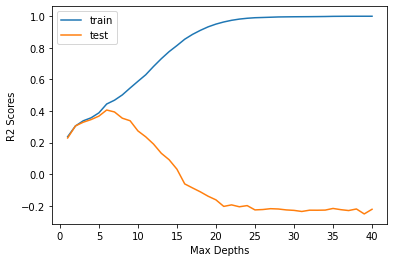

In [108]:
#plot the scores to visually determine the best max_depth
import matplotlib.pyplot as plt

plt.plot(depths, scores['Train Score'], label = 'train')
plt.plot(depths, scores['Test Score'], label = 'test')
plt.ylabel('R2 Scores')
plt.xlabel('Max Depths')
plt.legend()
plt.show()

From both the above outputs `Depth = 6` is the best test score output

In [110]:
# Create and evaluate a new model with the best depth from the loop above
best_dec = DecisionTreeRegressor(max_depth=best_depth)
best_dpipe = make_pipeline(num_processor,best_dec)

best_dpipe.fit(X_train, y_train)

print('Train')
eval_regression(y_train, best_dpipe.predict(X_train))
print('\nTest')
dtree_test_final = eval_regression(y_test, best_dpipe.predict(X_test))

Train
MAE 913.97,
 MSE 1643665.64,
 RMSE: 1282.06, 
 R^2: 0.4446

Test
MAE 898.52,
 MSE 1637266.54,
 RMSE: 1279.56, 
 R^2: 0.4066


Now the `test r^2` = `.4066` is almost double the default Regression Tree & the Linear Regression Model. Making this the best option